In [30]:
def helper_display_img(image, title):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

## Import Packages

In [31]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests

In [32]:
# URL of the image
url = 'https://st.depositphotos.com/1718692/3543/i/450/depositphotos_35431571-stock-photo-mountain-road-near-the-coniferous.jpg'

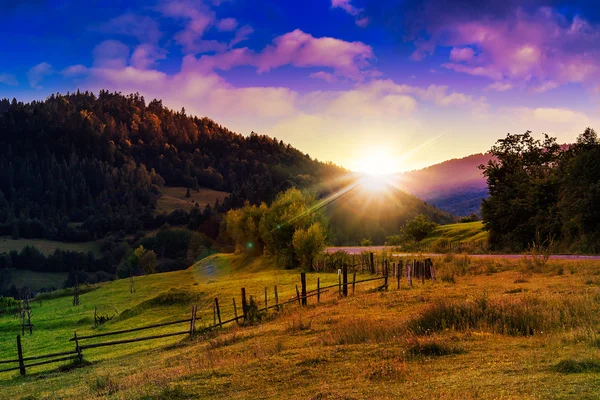

In [33]:
# Get the image from the URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

## Ekstraksi Fitur Berbasis Intensitas

Fitur berbasis intensitas melibatkan histogram citra, yang menunjukkan distribusi intensitas atau kecerahan dari pixel dalam citra.

(256, 1)


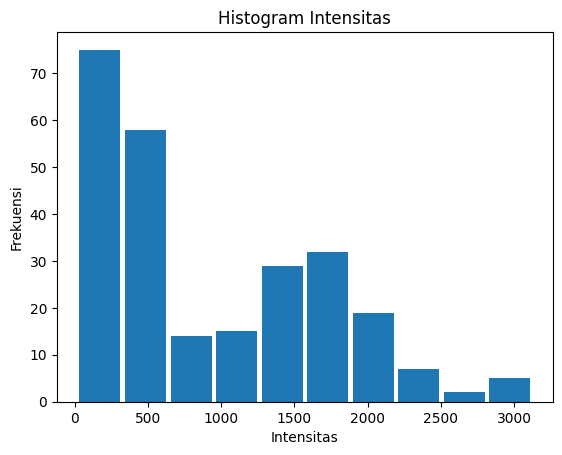

In [34]:
img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

# Hitung histogram intensitas
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
print(hist.shape)

# Tampilkan histogram
plt.hist(hist,rwidth=.9)
plt.title("Histogram Intensitas")
plt.xlabel("Intensitas")
plt.ylabel("Frekuensi")
plt.show()

## Ekstraksi Fitur Berbasis Geometri

Fitur berbasis geometri berfokus pada kontur dan bentuk objek dalam citra. Metode yang sering digunakan adalah deteksi kontur.

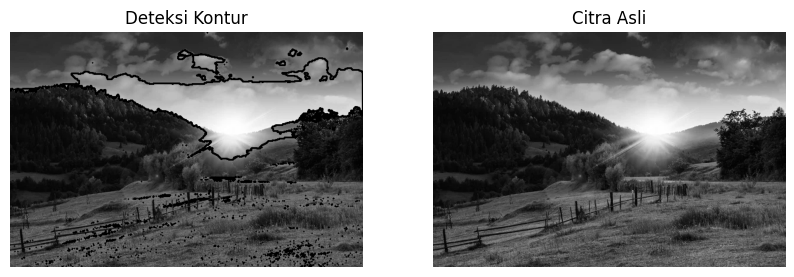

In [38]:
_, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Temukan kontur
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur
img_contours = cv2.drawContours(img_gray.copy(), contours, -1, (0, 255, 0), 2)

# Display
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
helper_display_img(img_contours, "Deteksi Kontur")

plt.subplot(1, 2, 2)
helper_display_img(img_gray, "Citra Asli")

plt.show()

## Ekstraksi Fitur Berbasis Tekstur

Fitur berbasis tekstur dapat diekstraksi menggunakan matriks co-occurrence atau Local Binary Pattern (LBP).



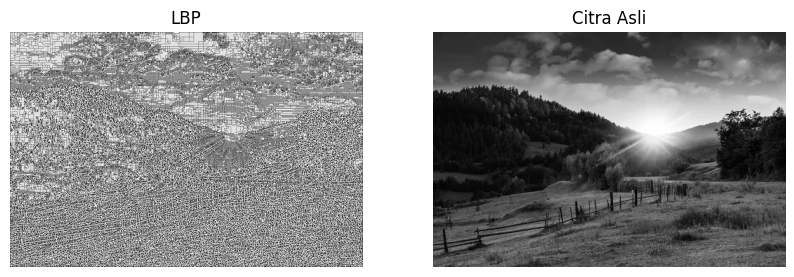

In [39]:
from skimage.feature import local_binary_pattern

# Parameter untuk LBP
radius = 1
n_points = 8 * radius

# Hitung LBP
lbp = local_binary_pattern(img_gray, n_points, radius, method="uniform")

# Tampilkan hasil LBP
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
helper_display_img(lbp, "LBP")

plt.subplot(1, 2, 2)
helper_display_img(img_gray, "Citra Asli")

plt.show()

## Ekstraksi Fitur Lokal (SIFT)

Ekstraksi fitur lokal seperti SIFT (Scale-Invariant Feature Transform) membantu mengidentifikasi titik-titik penting dalam citra.



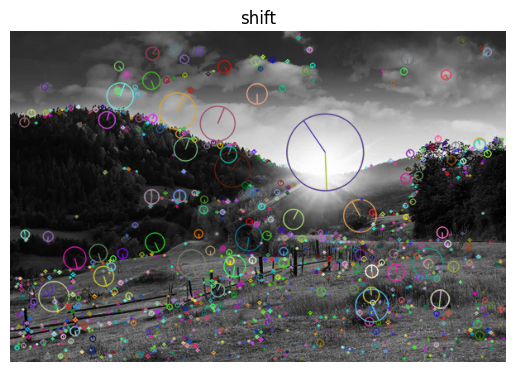

In [42]:
# Pastikan Anda memiliki OpenCV versi non-headless untuk menjalankan SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img_gray, None)

# Gambar keypoints
img_sift = cv2.drawKeypoints(img_gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
helper_display_img(img_sift, "shift")
plt.show()

## Ekstraksi Fitur Berbasis Warna

Ekstraksi fitur berbasis warna dilakukan dengan membagi ruang warna, misalnya RGB atau HSV, untuk menganalisis distribusi warna.



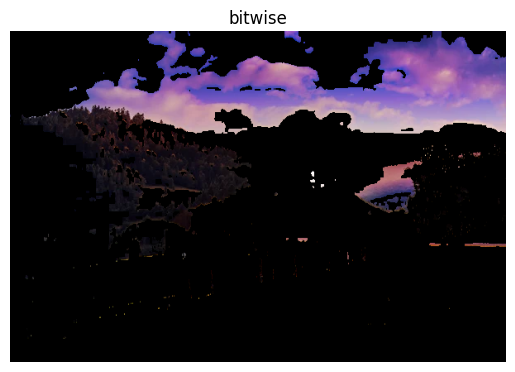

In [49]:
img_hsv = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2HSV)

lower = np.array([120,0,0])                   # bgr
upper = np.array([(255, 255, 255)])
mask = cv2.inRange(img_hsv, lower, upper)

#Dilation & Closing
dilation = cv2.dilate(mask, (5,5), 5)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, (7,7))

bitwise = cv2.bitwise_and(np.array(img), np.array(img) , mask=closing)

helper_display_img(bitwise, "bitwise")

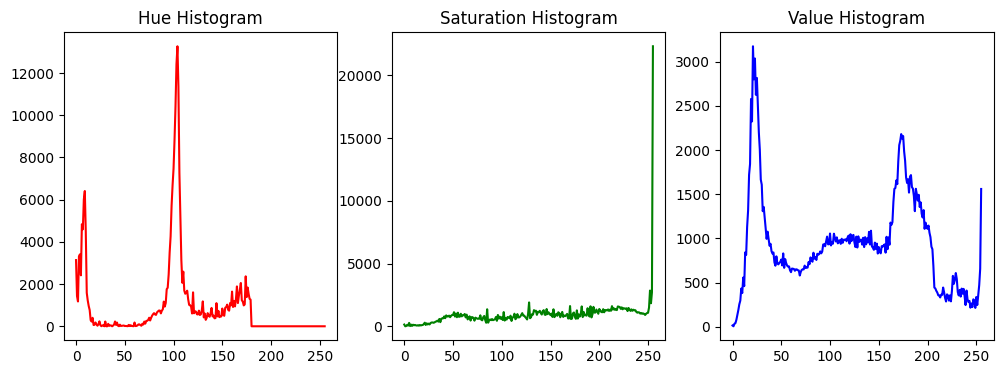

In [44]:
img_hsv = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2HSV)

# Hitung histogram pada kanal H, S, dan V
hist_hue = cv2.calcHist([img_hsv], [0], None, [256], [0, 256])
hist_saturation = cv2.calcHist([img_hsv], [1], None, [256], [0, 256])
hist_value = cv2.calcHist([img_hsv], [2], None, [256], [0, 256])

# Plot histogram untuk setiap kanal
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(hist_hue, color='r')
plt.title("Hue Histogram")
plt.subplot(1, 3, 2)
plt.plot(hist_saturation, color='g')
plt.title("Saturation Histogram")
plt.subplot(1, 3, 3)
plt.plot(hist_value, color='b')
plt.title("Value Histogram")
plt.show()